UNAD

Ivan Ramiro Quiroga

Agrupamiento en Hierarchical Clustering

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Descripción estadística:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75

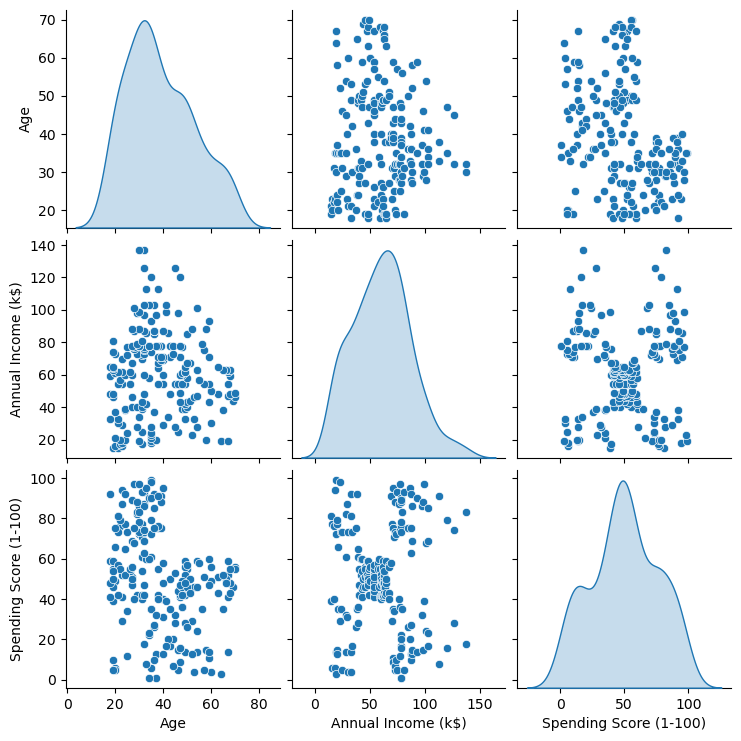

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

# Cargar los datos
df = pd.read_csv("Mall_Customers.csv")

# Análisis exploratorio de los datos
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción estadística:")
print(df.describe())
print("\nInformación del dataset:")
print(df.info())

# Visualización inicial
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()


2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


Datos después de eliminar columnas irrelevantes:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

Datos escalados:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]

Varianza explicada por cada componente principal:
[0.44266167 0.33308378]


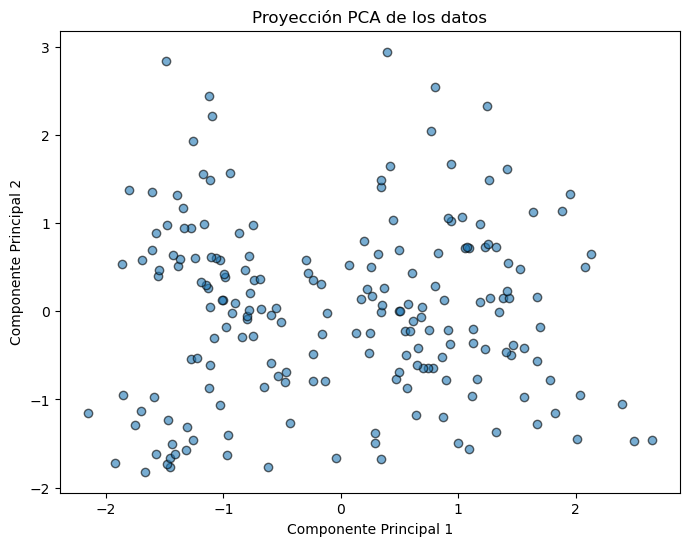

In [2]:
# Preprocesamiento de los datos
# Eliminar columnas innecesarias
df_cleaned = df.drop(columns=["CustomerID", "Gender"])
print("\nDatos después de eliminar columnas irrelevantes:")
print(df_cleaned.head())

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)
print("\nDatos escalados:")
print(scaled_data[:5])

# Reducción de dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Gráfico PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, edgecolor='k')
plt.title("Proyección PCA de los datos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [6]:
# Selección de características
# Se usará todo el dataset preprocesado para el modelo, ya que todas las características son relevantes.


4.Entrenar el modelo configurando los diferentes hiperparámetros.

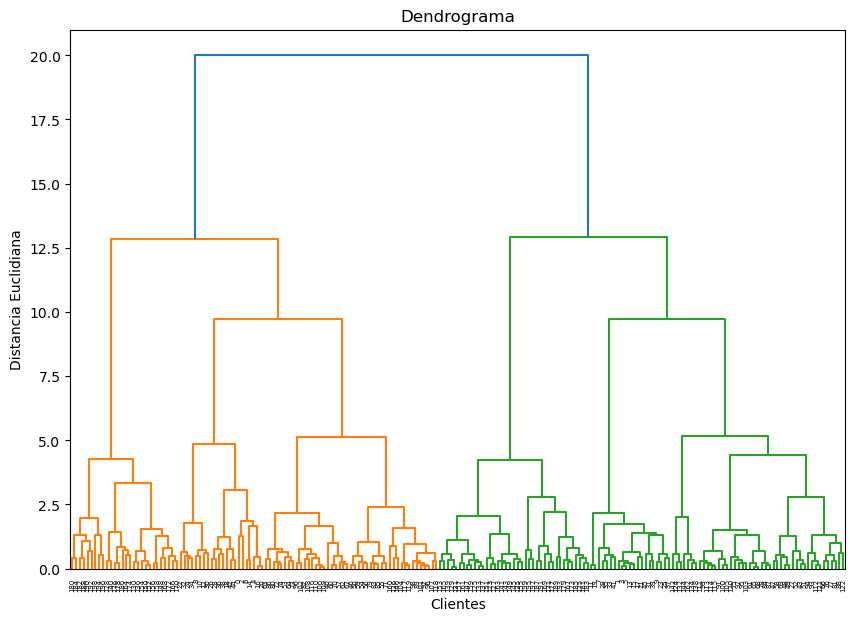

In [7]:
# Gráfico del dendrograma para determinar el número de clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Entrenamiento del modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters = model.fit_predict(scaled_data)

5.Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [8]:
# Evaluación del modelo
silhouette_avg = silhouette_score(scaled_data, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)
print("\nEvaluación del modelo:")
print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


Evaluación del modelo:
Coeficiente de Silhouette: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374


6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

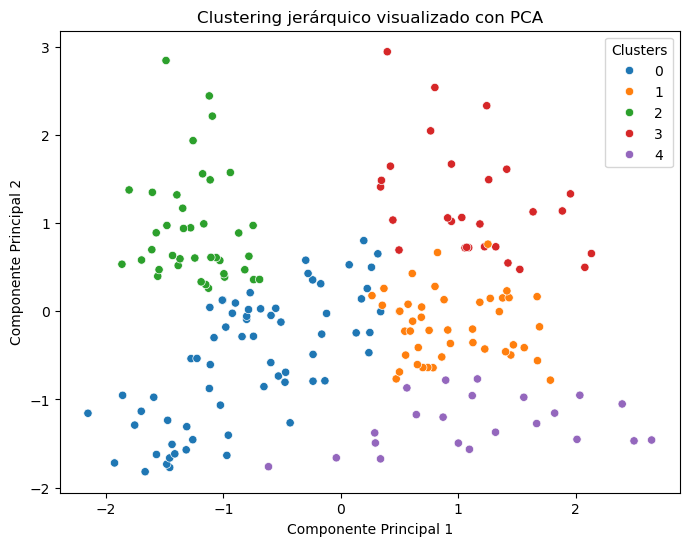

In [9]:
# Visualización de los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='tab10')
plt.title("Clustering jerárquico visualizado con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()

7.Interpretar, analizar y documentar los resultados obtenidos.

In [10]:
# Interpretación de resultados
print("\nInterpretación de resultados:")
print("1. Los clientes fueron segmentados en 5 grupos basados en su edad, ingreso anual y puntaje de gasto.")
print("2. Los coeficientes de evaluación indican que el modelo logra una buena separación entre clusters.")
print("3. Se pueden realizar estrategias de marketing personalizadas para cada grupo.")



Interpretación de resultados:
1. Los clientes fueron segmentados en 5 grupos basados en su edad, ingreso anual y puntaje de gasto.
2. Los coeficientes de evaluación indican que el modelo logra una buena separación entre clusters.
3. Se pueden realizar estrategias de marketing personalizadas para cada grupo.
